<a href="https://githubtocolab.com/borislevant/cvplayground/blob/main/scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

## Building Document Detection & Scanner
#### Excercising: edge detection, Hough transform, etc.
##### Dr. Boris Levant, Dec 8, 2020

The following example using the Canny edge detection and Hough transform detects the document in the picture, detects the bounding box

In [ ]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.filters import sobel, sobel_h, sobel_v
from skimage import data, io, color
import cv2

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
plt.rcParams['figure.figsize']=(13,13)

Cloning into 'images'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


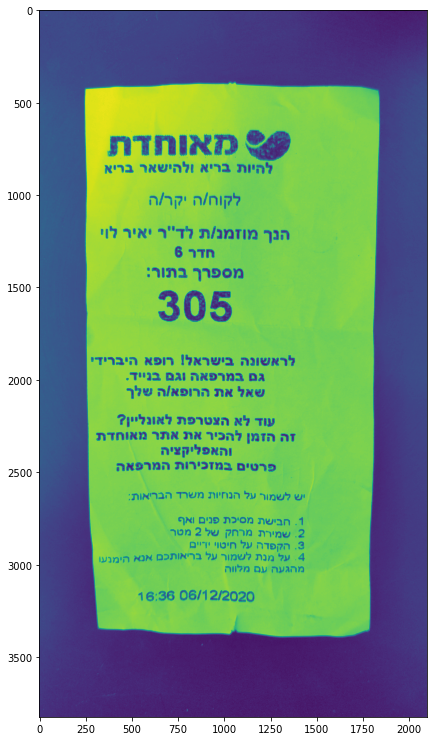

In [ ]:
!git clone https://github.com/borislevant/documentscan/ images
img=io.imread('images/ticket3.jpg')
img=color.rgb2gray(img)
plt.imshow(img)

In [ ]:
gaussianBlurKernel = np.array(([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]]), np.float32)
sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9

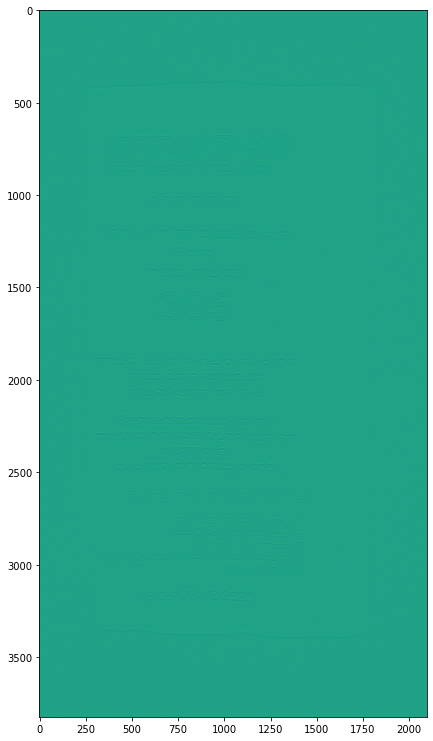

In [ ]:
gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
meanBlur = cv2.filter2D(src=img, kernel=meanBlurKernel, ddepth=-1)
sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)
plt.imshow(gaussianBlur)


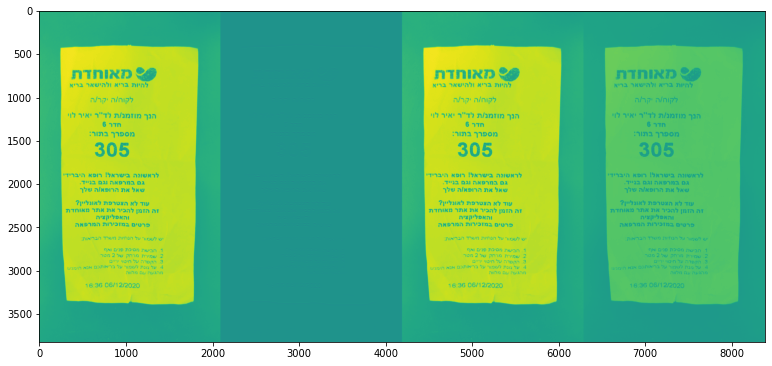

In [ ]:
horizontalStack = np.concatenate((img, gaussianBlur, meanBlur, sharpen), axis=1)
cv2.imwrite("Output.jpg", horizontalStack)
plt.imshow(horizontalStack)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


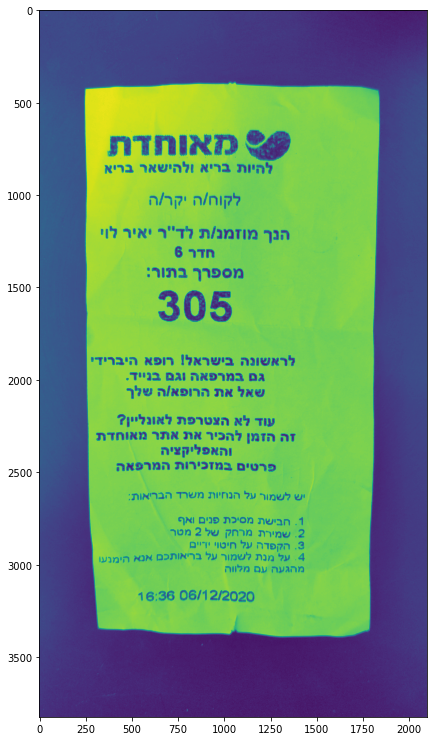

In [ ]:
img_grey=color.rgb2gray(img)
plt.imshow(img_grey)

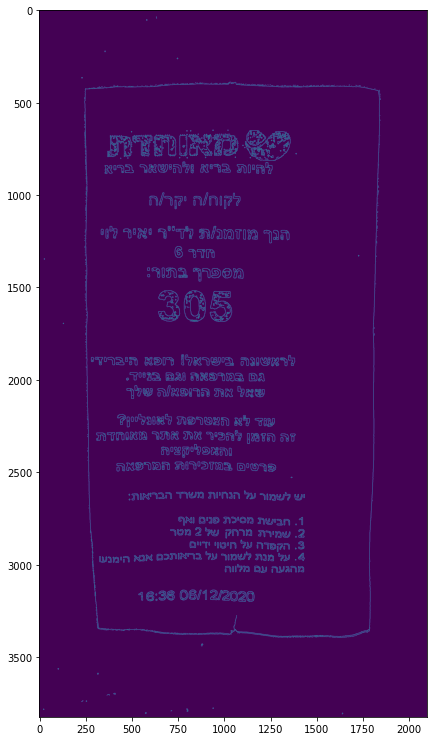

In [ ]:
img_edges=canny(img_grey, sigma=1)
img_edges = img_edges.astype(np.uint8) * 255
plt.imshow(img_edges)

Text(0, 0.5, 'Distance')

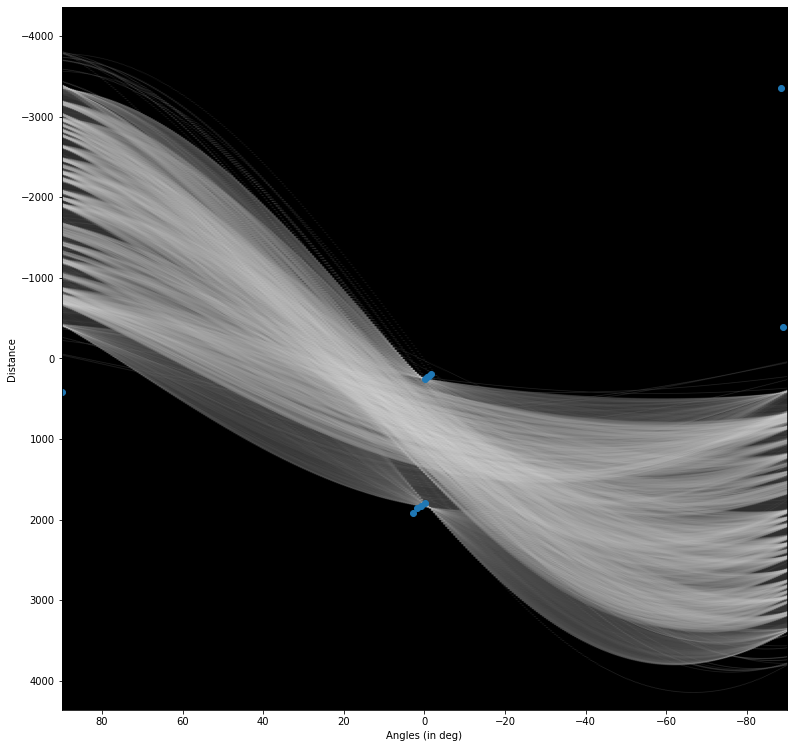

In [ ]:
h, theta, d = hough_line(img_edges, theta=np.linspace(-np.pi/2, np.pi/2, 360))
v, angle, dist = hough_line_peaks(h, theta, d)

plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/50)
plt.scatter(np.rad2deg(angle), dist)
plt.xlabel('Angles (in deg)')
plt.ylabel('Distance')

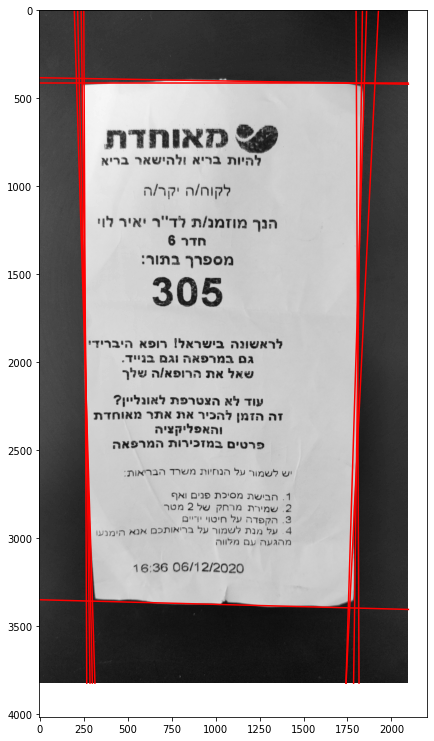

In [ ]:
def inside(img, y):
    if y<=0 or y>=img.shape[0]:
        return False
    return True

plt.imshow(img, cmap=cm.gray)
origin = np.array((0, img.shape[1]))
originy = np.array((0, img.shape[0]))
for v, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    x0, x1 = (dist - originy * np.sin(angle)) / np.cos(angle)
    #print(f'General angles {(v,np.rad2deg(angle),dist)}')
    if inside(img,y0) and inside(img,y1):
        plt.plot(origin, (y0, y1), '-r')
    else:
        plt.plot((x0,x1), originy, '-r')


##### Harris Corner Detector

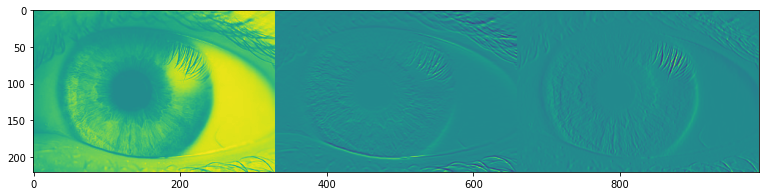

In [ ]:
img_grey = color.rgb2gray(img)
img_grey_x = sobel_h(img_grey)
img_grey_y = sobel_v(img_grey)
plt.imshow(np.hstack([img_grey, img_grey_x, img_grey_y]))

https://dropbox.tech/machine-learning/fast-and-accurate-document-detection-for-scanning


##### Detecting the eyes

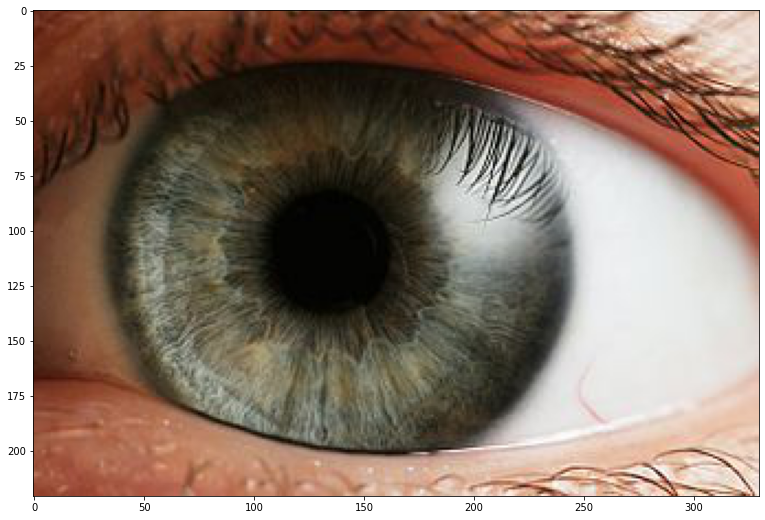

In [ ]:
img=io.imread('images/eye.jpg')
plt.imshow(img)

In [ ]:
img_grey=color.rgb2gray(img)
plt.imshow(img_grey)

In [ ]:
img_edges=canny(img_grey, sigma=2)
img_edges = img_edges.astype(np.uint8) * 255
plt.imshow(img_edges)

In [ ]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter


In [ ]:
hough_radii = np.arange(30,150,1)
hough_res = hough_circle(img_edges, hough_radii)

In [ ]:
acc, cx, cy, rad = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=4)

In [ ]:
image=img.copy()
for cnty,cntx,radii in zip(cy,cx,rad):
    circx, circy = circle_perimeter(cnty,cntx,radii,shape=image.shape)
    image[circx,circy]=(220,200,0)
plt.imshow(image)
